In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/NSE-candlesticks/30min_N50_10yr.csv')

In [ ]:
df.drop(columns = 'volume', inplace = True)

In [ ]:
df

,date,open,high,low,close
0,2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55
1,2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55
2,2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35
3,2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35
4,2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65
...,...,...,...,...,...
19906,2021-03-25 13:15:00+05:30,14295.70,14423.70,14290.30,14412.10
19907,2021-03-25 13:45:00+05:30,14408.45,14447.20,14376.35,14400.75
19908,2021-03-25 14:15:00+05:30,14400.70,14432.55,14355.60,14432.55
19909,2021-03-25 14:45:00+05:30,14432.20,14493.05,14274.15,14299.00


In [ ]:
df.date = pd.to_datetime(df.date)

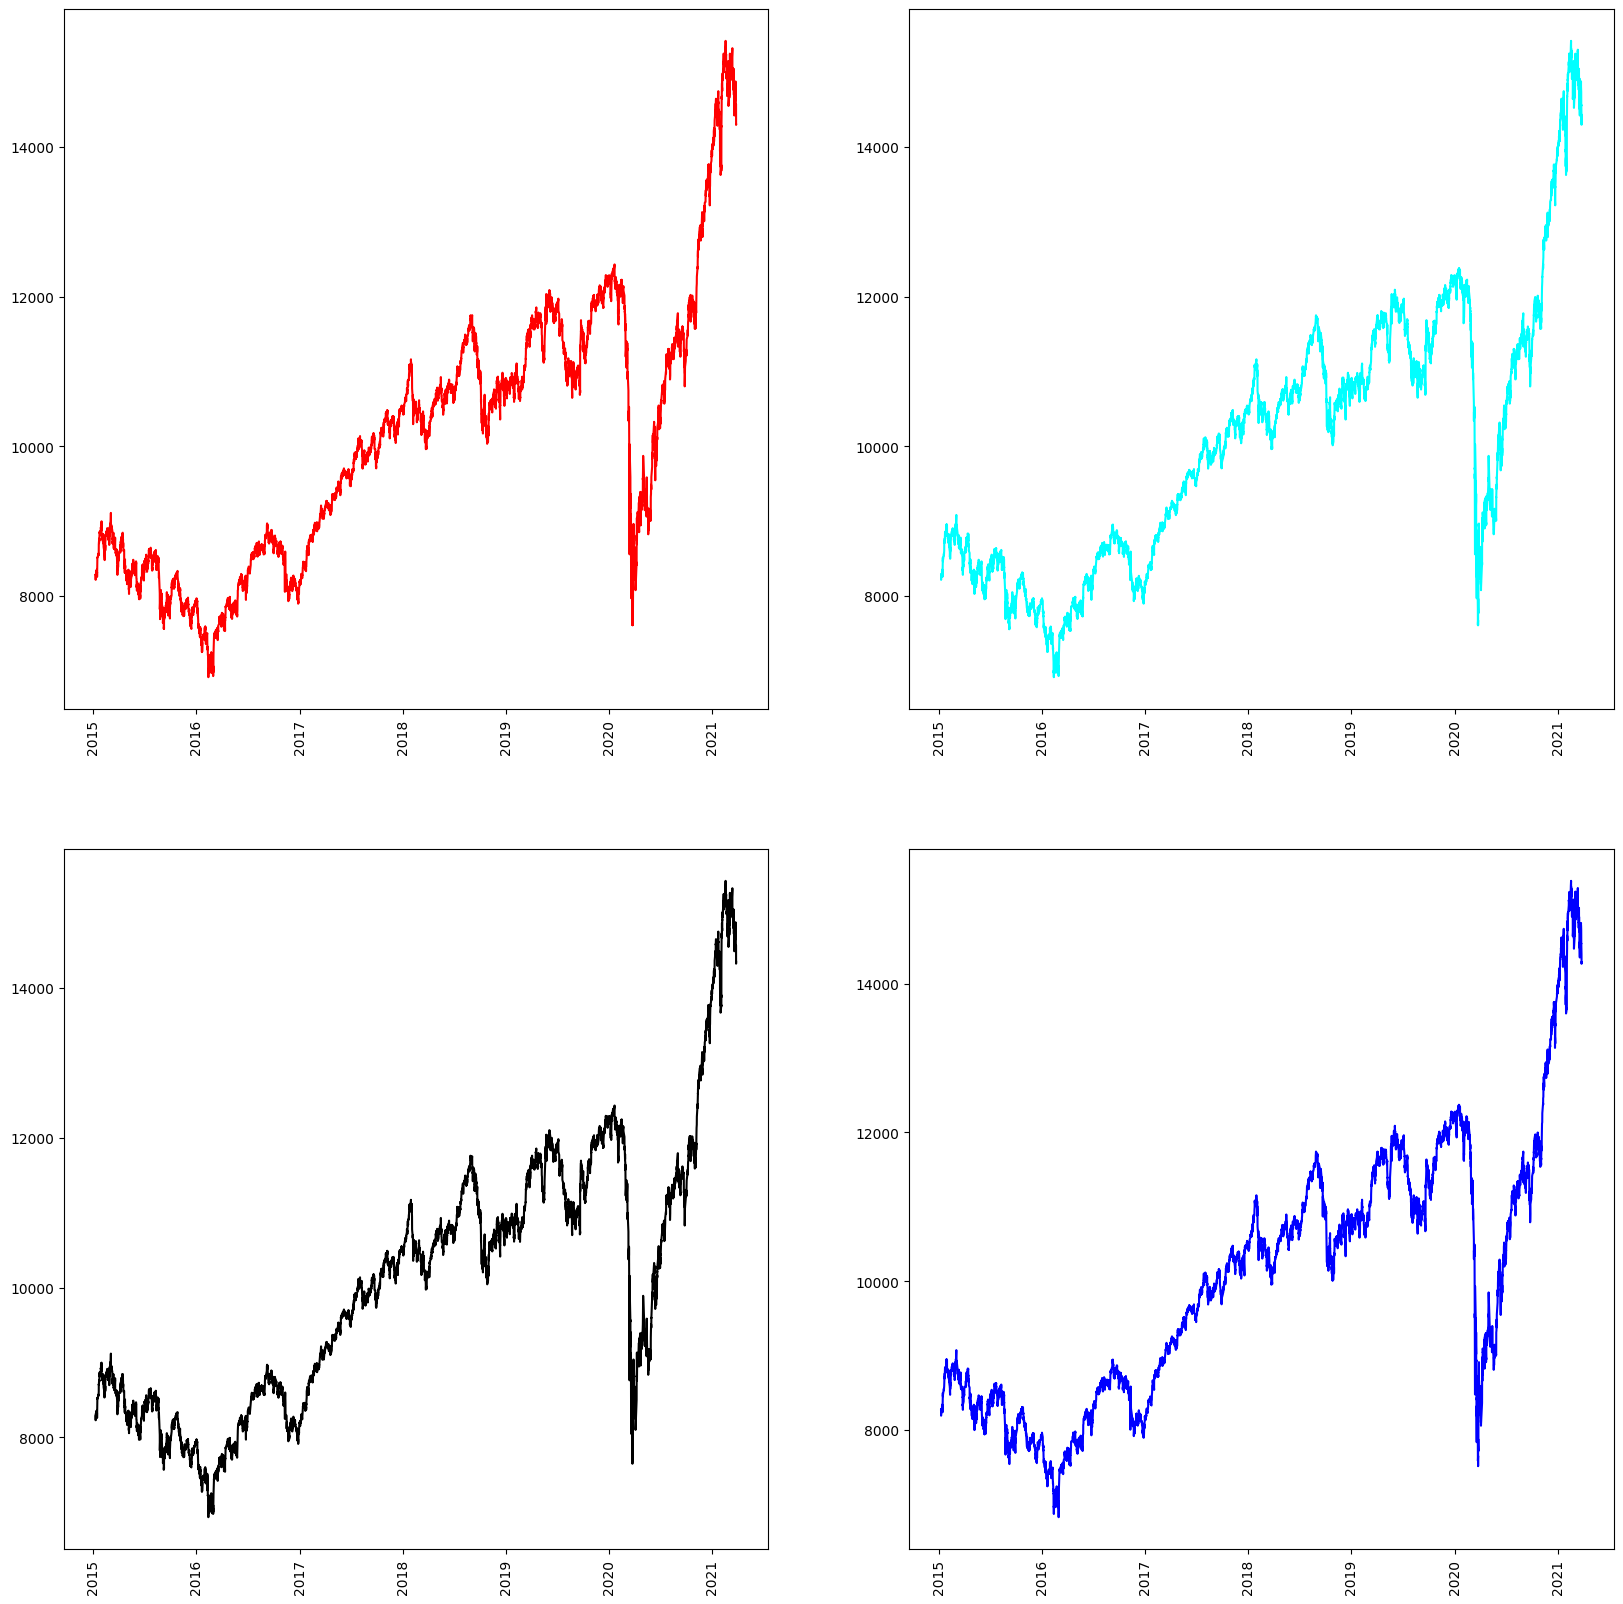

In [ ]:
plt.figure(figsize = (20,20))


plt.subplot(2,2,1,)
plt.plot(df['date'],df['open'], color = 'red')
plt.xticks(rotation = 'vertical')

plt.subplot(2,2,2)
plt.plot(df['date'],df['close'], color = 'cyan')
plt.xticks(rotation = 'vertical')

plt.subplot(2,2,3)
plt.plot(df['date'],df['high'], color = 'black')
plt.xticks(rotation = 'vertical')

plt.subplot(2,2,4)
plt.plot(df['date'],df['low'], color = 'blue')
plt.xticks(rotation = 'vertical')

plt.show()

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.set_index('date')


,open,high,low,close
date,,,,
2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55
2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55
2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35
2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35
2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65
...,...,...,...,...
2021-03-25 13:15:00+05:30,14295.70,14423.70,14290.30,14412.10
2021-03-25 13:45:00+05:30,14408.45,14447.20,14376.35,14400.75
2021-03-25 14:15:00+05:30,14400.70,14432.55,14355.60,14432.55


In [ ]:
df.date.dtype

datetime64[ns, pytz.FixedOffset(330)]

In [ ]:
df.describe()

,open,high,low,close
count,19911.000000,19911.000000,19911.000000,19911.000000
mean,10074.461222,10087.919919,10059.144322,10073.657973
std,1743.408060,1745.345701,1740.647877,1743.173351
min,6912.800000,6932.100000,6826.350000,6912.300000
25%,8555.700000,8567.700000,8543.400000,8555.175000
50%,10185.700000,10198.000000,10168.950000,10185.250000
75%,11262.075000,11279.525000,11243.375000,11260.400000
max,15419.150000,15431.300000,15380.700000,15419.100000


In [ ]:
#Train Test Split

In [ ]:
import sklearn
from sklearn.model_selection import TimeSeriesSplit

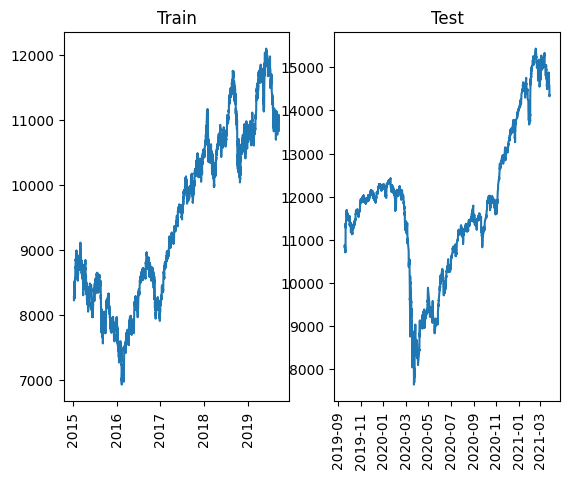

In [ ]:
plt.subplot(1,2,1)
plt.plot(df['date'][1:15000], df['high'][1:15000])
plt.xticks(rotation = 'vertical')
plt.title("Train")


plt.subplot(1,2,2)
plt.plot(df['date'][15000:], df['high'][15000:])
plt.xticks(rotation = 'vertical')

plt.title("Test")

plt.show()

[]

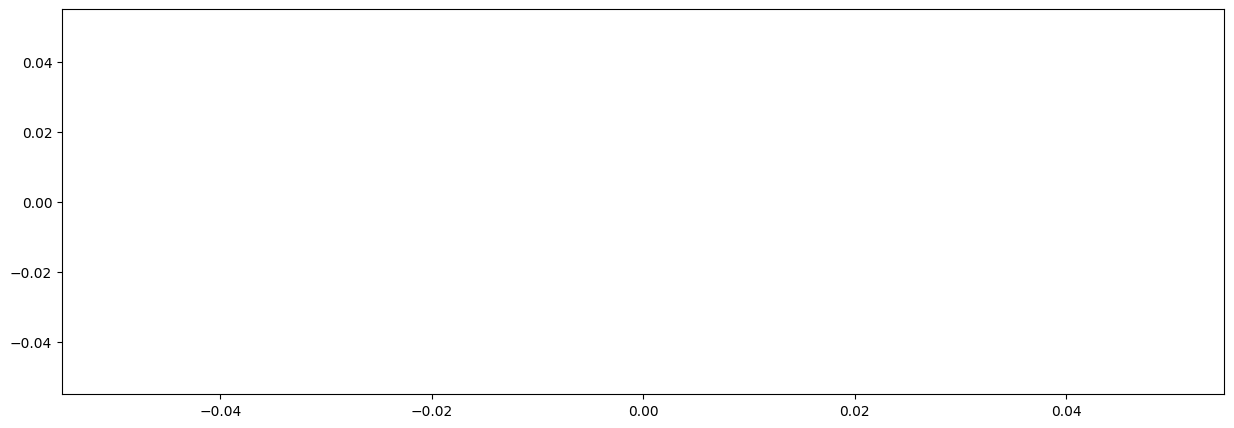

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(ax=ax,label = "Training")
plt.plot(ax=ax,label = "Testing")

In [ ]:
week1_data = df[0:70]
week1_data

,date,open,high,low,close
0,2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55
1,2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55
2,2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35
3,2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35
4,2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65
...,...,...,...,...,...
65,2015-01-19 09:15:00+05:30,8553.40,8561.15,8548.20,8553.95
66,2015-01-19 09:45:00+05:30,8554.05,8565.80,8552.05,8560.30
67,2015-01-19 10:15:00+05:30,8560.40,8570.80,8556.85,8560.00
68,2015-01-19 10:45:00+05:30,8560.60,8569.95,8554.75,8566.70


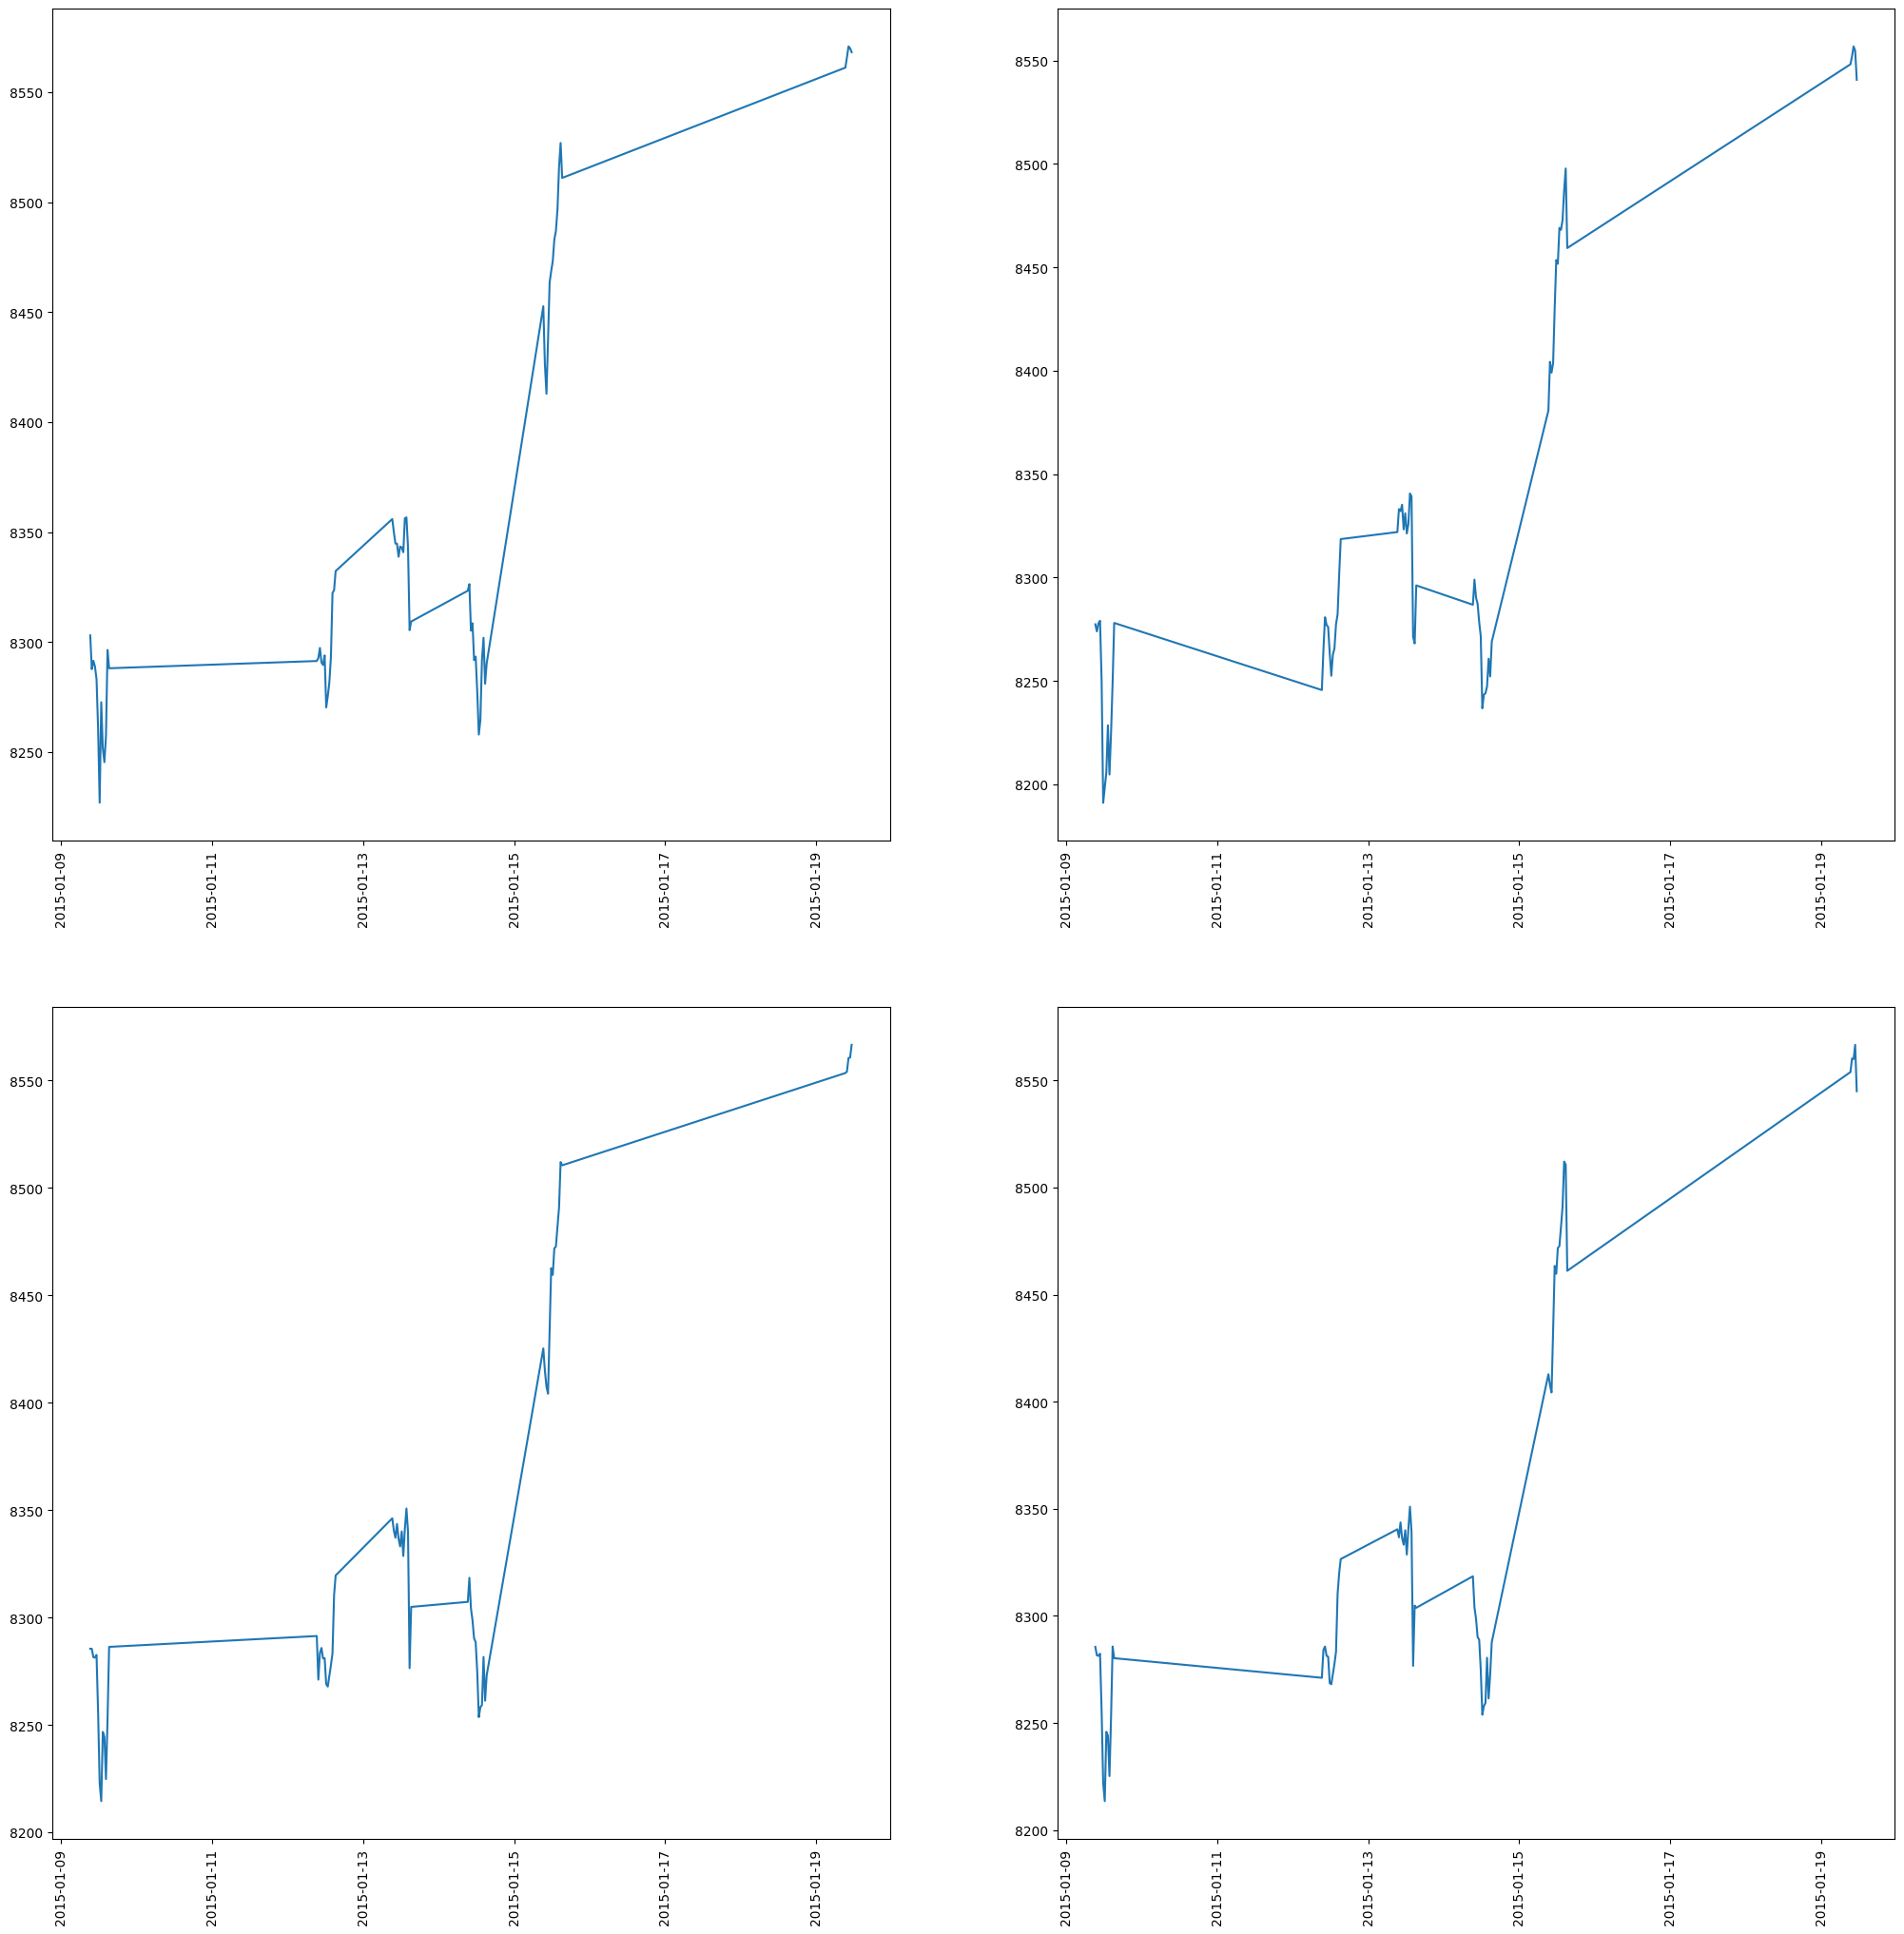

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(2,2,1)
plt.plot(week1_data['date'], week1_data['high'])
plt.xticks(rotation = 'vertical')

plt.subplot(2,2,2)
plt.plot(week1_data['date'], week1_data['low'])
plt.xticks(rotation = 'vertical')


plt.subplot(2,2,3)
plt.plot(week1_data['date'], week1_data['open'])
plt.xticks(rotation = 'vertical')


plt.subplot(2,2,4)
plt.plot(week1_data['date'], week1_data['close'])
plt.xticks(rotation = 'vertical')

plt.show()

In [ ]:
df.index = df.date

In [ ]:
df.drop(columns = 'date',axis = 1,inplace = True)

In [ ]:
df

,open,high,low,close
date,,,,
2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55
2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55
2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35
2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35
2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65
...,...,...,...,...
2021-03-25 13:15:00+05:30,14295.70,14423.70,14290.30,14412.10
2021-03-25 13:45:00+05:30,14408.45,14447.20,14376.35,14400.75
2021-03-25 14:15:00+05:30,14400.70,14432.55,14355.60,14432.55


In [ ]:
def create_features(df):
  df['hour'] = df.index.hour
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofweek'] = df.index.day_of_week
  df['quarter'] = df.index.quarter
  df['dayofYear'] = df.index.day_of_year
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week
  return df



In [ ]:
df = create_features(df)

In [ ]:
df

,open,high,low,close,hour,month,year,dayofweek,quarter,dayofYear,dayofmonth,weekofyear
date,,,,,,,,,,,,
2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55,9,1,2015,4,1,9,9,2
2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55,9,1,2015,4,1,9,9,2
2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35,10,1,2015,4,1,9,9,2
2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35,10,1,2015,4,1,9,9,2
2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65,11,1,2015,4,1,9,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 13:15:00+05:30,14295.70,14423.70,14290.30,14412.10,13,3,2021,3,1,84,25,12
2021-03-25 13:45:00+05:30,14408.45,14447.20,14376.35,14400.75,13,3,2021,3,1,84,25,12
2021-03-25 14:15:00+05:30,14400.70,14432.55,14355.60,14432.55,14,3,2021,3,1,84,25,12


In [ ]:
df.corr()['close']

open          0.999903
high          0.999948
low           0.999949
close         1.000000
hour         -0.000151
month         0.015648
year          0.843734
dayofweek     0.007219
quarter       0.016632
dayofYear     0.014310
dayofmonth   -0.017314
weekofyear    0.011375
Name: close, dtype: float64

In [ ]:
df.corr()['open']

open          1.000000
high          0.999947
low           0.999937
close         0.999903
hour         -0.000595
month         0.015569
year          0.843694
dayofweek     0.007084
quarter       0.016550
dayofYear     0.014231
dayofmonth   -0.017322
weekofyear    0.011282
Name: open, dtype: float64

In [ ]:
df.corr()['high']

open          0.999947
high          1.000000
low           0.999901
close         0.999948
hour         -0.000816
month         0.014984
year          0.844994
dayofweek     0.007304
quarter       0.015828
dayofYear     0.013662
dayofmonth   -0.017184
weekofyear    0.010741
Name: high, dtype: float64

In [ ]:
df.corr()['close']

open          0.999903
high          0.999948
low           0.999949
close         1.000000
hour         -0.000151
month         0.015648
year          0.843734
dayofweek     0.007219
quarter       0.016632
dayofYear     0.014310
dayofmonth   -0.017314
weekofyear    0.011375
Name: close, dtype: float64

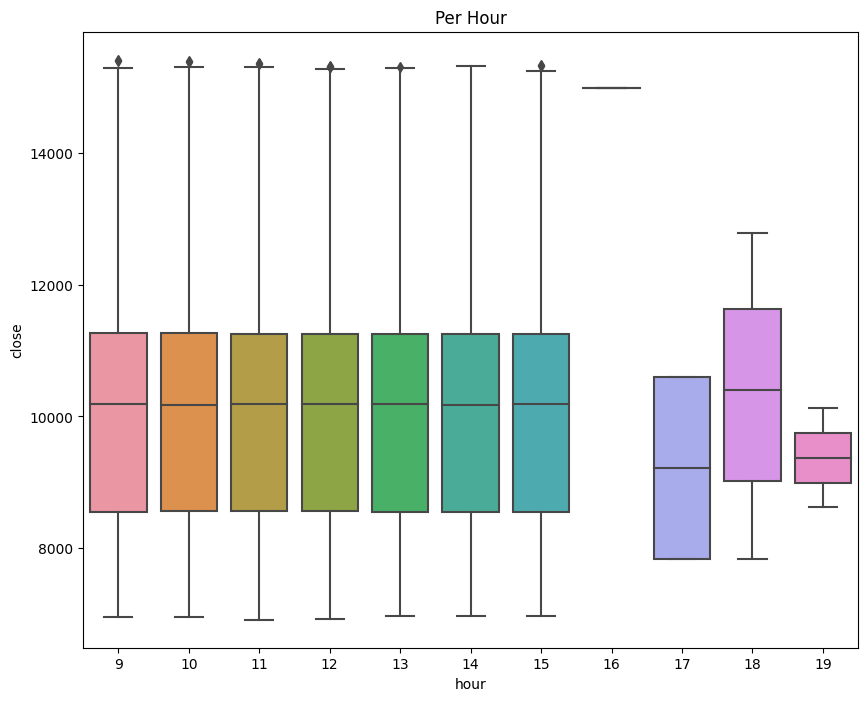

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df, x = 'hour', y="close")
ax.set_title("Per Hour")
plt.show()

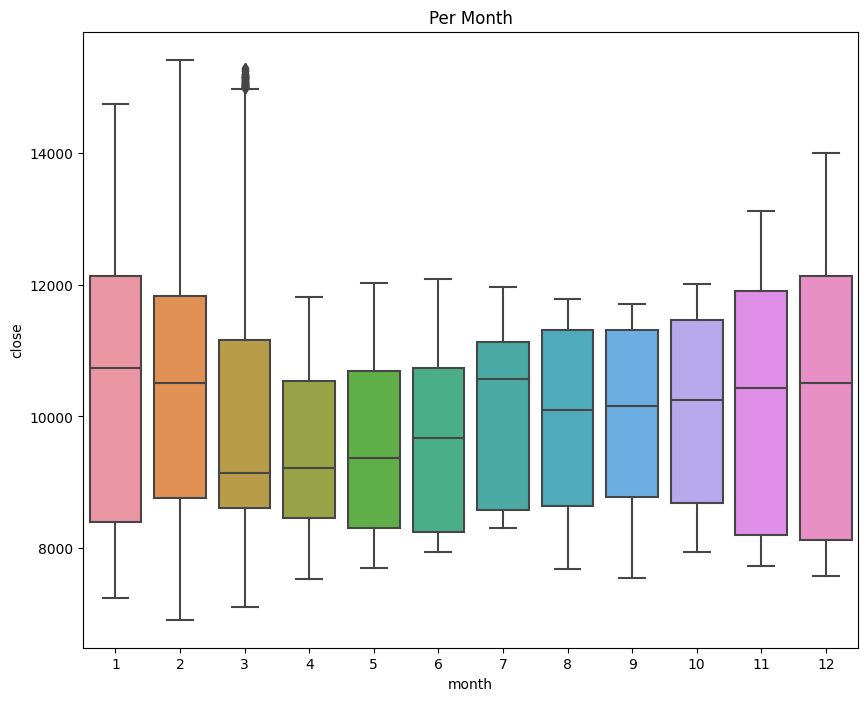

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df, x = 'month', y="close")
ax.set_title("Per Month")
plt.show()

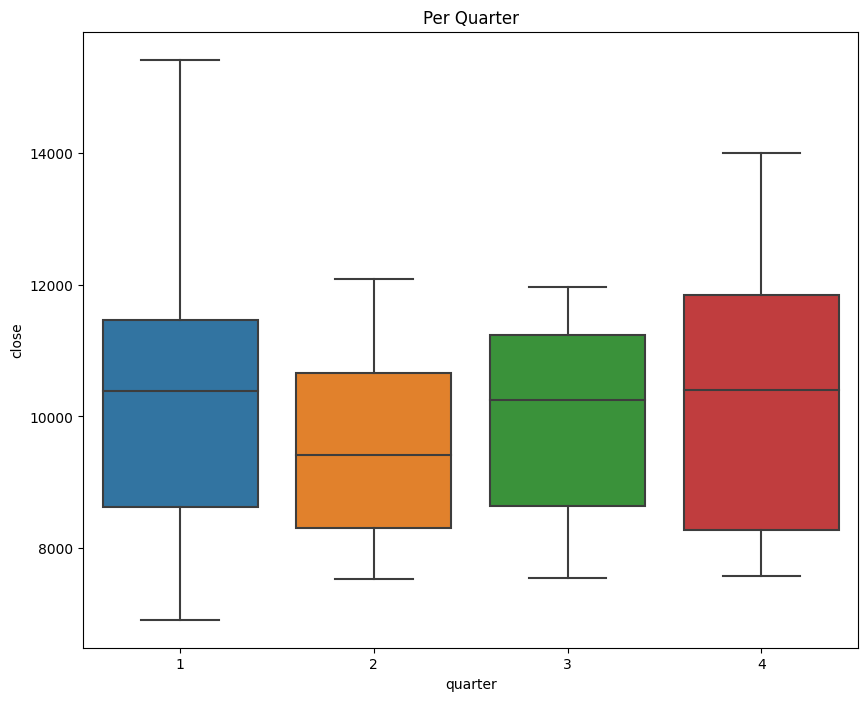

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df, x = 'quarter', y="close")
ax.set_title("Per Quarter")
plt.show()

In [ ]:
reg = xgb.XGBRFRegressor(n_estimators = 1000, learning_rate = 50)

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 42, shuffle = False)

In [ ]:
train_set = create_features(train_set)

In [ ]:
test_set = create_features(test_set)

In [ ]:
train_set

,open,high,low,close,hour,month,year,dayofweek,quarter,dayofYear,dayofmonth,weekofyear
date,,,,,,,,,,,,
2015-01-09 09:15:00+05:30,8285.45,8303.00,8277.40,8285.55,9,1,2015,4,1,9,9,2
2015-01-09 09:45:00+05:30,8285.40,8287.65,8273.95,8281.55,9,1,2015,4,1,9,9,2
2015-01-09 10:15:00+05:30,8281.50,8291.45,8277.95,8281.35,10,1,2015,4,1,9,9,2
2015-01-09 10:45:00+05:30,8281.30,8288.85,8279.10,8282.35,10,1,2015,4,1,9,9,2
2015-01-09 11:15:00+05:30,8282.55,8283.20,8250.20,8255.65,11,1,2015,4,1,9,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17 14:15:00+05:30,11366.75,11375.70,11340.20,11357.20,14,5,2019,4,2,137,17,20
2019-05-17 14:45:00+05:30,11357.40,11415.15,11357.30,11397.95,14,5,2019,4,2,137,17,20
2019-05-17 15:15:00+05:30,11397.70,11424.10,11394.60,11417.25,15,5,2019,4,2,137,17,20


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13937 entries, 2015-01-09 09:15:00+05:30 to 2019-05-20 09:45:00+05:30
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        13937 non-null  float64
 1   high        13937 non-null  float64
 2   low         13937 non-null  float64
 3   close       13937 non-null  float64
 4   hour        13937 non-null  int64  
 5   month       13937 non-null  int64  
 6   year        13937 non-null  int64  
 7   dayofweek   13937 non-null  int64  
 8   quarter     13937 non-null  int64  
 9   dayofYear   13937 non-null  int64  
 10  dayofmonth  13937 non-null  int64  
 11  weekofyear  13937 non-null  UInt32 
dtypes: UInt32(1), float64(4), int64(7)
memory usage: 1.3 MB


In [ ]:
train_set['weekofyear'] = train_set['weekofyear'].astype(int)
test_set['weekofyear'] = test_set['weekofyear'].astype(int)

In [ ]:
features = ['hour',	'month',	'year',	'dayofweek',	'quarter',	'dayofYear','weekofyear','dayofmonth']
target = ['close','open','high','low']

In [ ]:
x_train = train_set[features]
y_train = train_set[target]

In [ ]:
x_test = test_set[features]
y_test = test_set[target]

In [ ]:
reg.fit(x_train, y_train, eval_set =[(x_test, y_test)],  verbose = True)

[0]	validation_0-rmse:550026.48716


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=50, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1000, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None, ...)

In [ ]:
reg.feature_importances_

array([1.6159147e-06, 1.4724601e-02, 9.3028659e-01, 1.3685432e-04,
       1.6757967e-02, 1.6427120e-02, 2.1140674e-02, 5.2463240e-04],
      dtype=float32)

In [ ]:
imp = pd.DataFrame(reg.feature_importances_, index = features, columns=['importances'])

In [ ]:
imp


,importances
hour,0.000002
month,0.014725
year,0.930287
dayofweek,0.000137
quarter,0.016758
dayofYear,0.016427
weekofyear,0.021141
dayofmonth,0.000525


<BarContainer object of 8 artists>

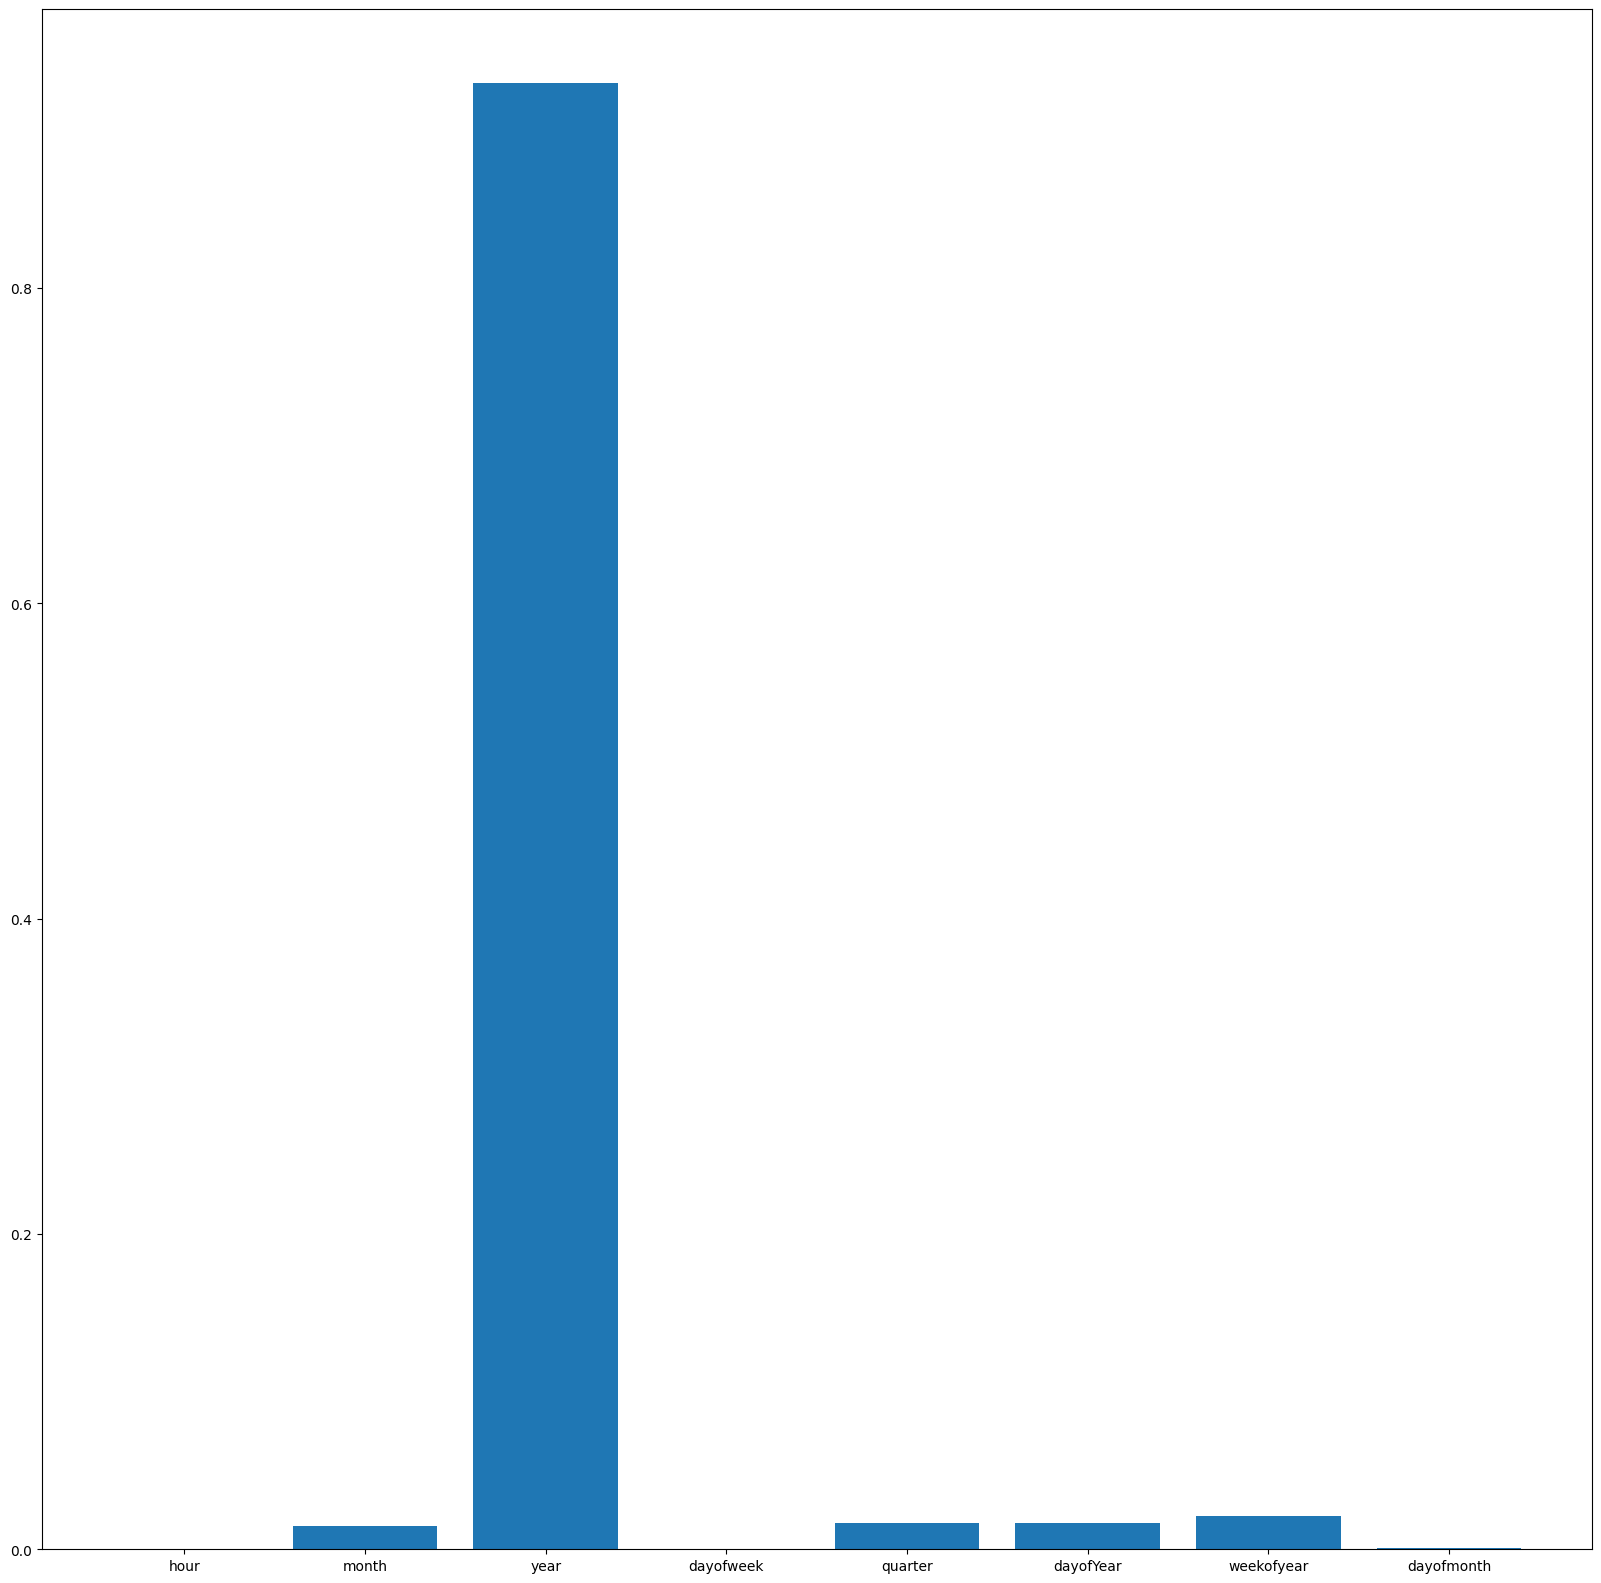

In [ ]:
plt.figure(figsize = (20,20))
plt.bar(imp.index, imp['importances'])

In [ ]:
df.describe()

,open,high,low,close,hour,month,year,dayofweek,quarter,dayofYear,dayofmonth,weekofyear
count,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.000000,19911.0
mean,10074.461222,10087.919919,10059.144322,10073.657973,11.774446,6.350610,2017.646276,2.003415,2.448596,177.995329,15.763096,25.995028
std,1743.408060,1745.345701,1740.647877,1743.173351,1.895222,3.486426,1.801023,1.412290,1.128979,106.600044,8.769575,15.251639
min,6912.800000,6932.100000,6826.350000,6912.300000,9.000000,1.000000,2015.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,8555.700000,8567.700000,8543.400000,8555.175000,10.000000,3.000000,2016.000000,1.000000,1.000000,82.000000,8.000000,12.0
50%,10185.700000,10198.000000,10168.950000,10185.250000,12.000000,6.000000,2018.000000,2.000000,2.000000,176.000000,16.000000,26.0
75%,11262.075000,11279.525000,11243.375000,11260.400000,13.000000,9.000000,2019.000000,3.000000,3.000000,270.000000,23.000000,39.0
max,15419.150000,15431.300000,15380.700000,15419.100000,19.000000,12.000000,2021.000000,6.000000,4.000000,366.000000,31.000000,53.0


In [ ]:
y_predicted = reg.predict(x_test)

In [ ]:
y_predicted

array([[570345.75, 570809.2 , 572098.44, 568197.1 ],
       [570345.75, 570809.2 , 572098.44, 568197.1 ],
       [570345.75, 570809.2 , 572098.44, 568197.1 ],
       ...,
       [570920.44, 571440.9 , 571905.56, 570334.25],
       [570920.44, 571440.9 , 571905.56, 570334.25],
       [570920.44, 571440.9 , 571905.56, 570334.25]], dtype=float32)

In [ ]:
y_predicted = pd.DataFrame(y_predicted)

In [ ]:
y_predicted

,0,1,2,3
0,570345.7500,570809.1875,572098.4375,568197.125
1,570345.7500,570809.1875,572098.4375,568197.125
2,570345.7500,570809.1875,572098.4375,568197.125
3,570345.7500,570809.1875,572098.4375,568197.125
4,570345.7500,570809.1875,572098.4375,568197.125
...,...,...,...,...
5969,570920.4375,571440.8750,571905.5625,570334.250
5970,570920.4375,571440.8750,571905.5625,570334.250
5971,570920.4375,571440.8750,571905.5625,570334.250
5972,570920.4375,571440.8750,571905.5625,570334.250


In [ ]:
y_predicted.index = x_test.index

In [ ]:
y_predicted.columns = y_test.columns

In [ ]:
y_predicted

,close,open,high,low
date,,,,
2019-05-20 10:15:00+05:30,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 10:45:00+05:30,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 11:15:00+05:30,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 11:45:00+05:30,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 12:15:00+05:30,570345.7500,570809.1875,572098.4375,568197.125
...,...,...,...,...
2021-03-25 13:15:00+05:30,570920.4375,571440.8750,571905.5625,570334.250
2021-03-25 13:45:00+05:30,570920.4375,571440.8750,571905.5625,570334.250
2021-03-25 14:15:00+05:30,570920.4375,571440.8750,571905.5625,570334.250


In [ ]:
final_test_dataset = pd.concat([x_test, y_predicted], axis = 1)

In [ ]:
final_test_dataset

,hour,month,year,dayofweek,quarter,dayofYear,weekofyear,dayofmonth,close,open,high,low
date,,,,,,,,,,,,
2019-05-20 10:15:00+05:30,10,5,2019,0,2,140,21,20,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 10:45:00+05:30,10,5,2019,0,2,140,21,20,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 11:15:00+05:30,11,5,2019,0,2,140,21,20,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 11:45:00+05:30,11,5,2019,0,2,140,21,20,570345.7500,570809.1875,572098.4375,568197.125
2019-05-20 12:15:00+05:30,12,5,2019,0,2,140,21,20,570345.7500,570809.1875,572098.4375,568197.125
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 13:15:00+05:30,13,3,2021,3,1,84,12,25,570920.4375,571440.8750,571905.5625,570334.250
2021-03-25 13:45:00+05:30,13,3,2021,3,1,84,12,25,570920.4375,571440.8750,571905.5625,570334.250
2021-03-25 14:15:00+05:30,14,3,2021,3,1,84,12,25,570920.4375,571440.8750,571905.5625,570334.250


In [ ]:
test_set.sample(5)

,open,high,low,close,hour,month,year,dayofweek,quarter,dayofYear,dayofmonth,weekofyear
date,,,,,,,,,,,,
2020-10-07 10:45:00+05:30,11736.70,11744.2,11701.70,11710.60,10,10,2020,2,4,281,7,41
2020-09-24 10:45:00+05:30,10943.60,10944.6,10918.20,10928.25,10,9,2020,3,3,268,24,39
2020-02-20 12:45:00+05:30,12141.00,12141.6,12132.15,12137.90,12,2,2020,3,1,51,20,8
2019-12-27 12:15:00+05:30,12214.25,12217.9,12205.55,12214.55,12,12,2019,4,4,361,27,52
2020-02-17 14:45:00+05:30,12045.70,12068.8,12037.20,12042.75,14,2,2020,0,1,48,17,8
